In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt 


In [4]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [6]:
x.shape

(100, 1)

In [7]:
y.shape

(100,)

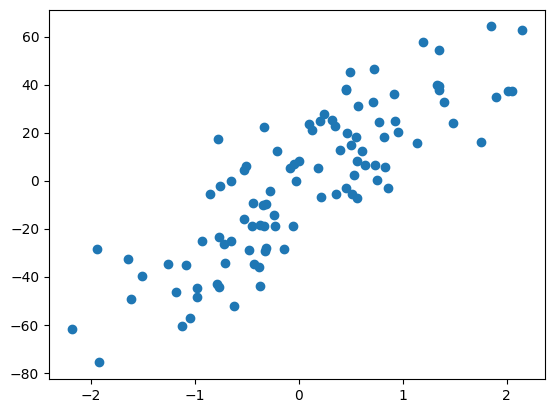

In [8]:
plt.scatter(x,y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr=LinearRegression()

In [11]:
lr.fit(x,y)

LinearRegression()

In [12]:
lr.coef_

array([27.82809103])

In [13]:
lr.intercept_

-2.29474455867698

In [14]:
from sklearn.linear_model import Ridge

In [16]:
r=Ridge(alpha=10)

In [17]:
r.fit(x,y)

Ridge(alpha=10)

In [18]:
r.coef_

array([24.9546267])

In [19]:
r.intercept_

-2.126913003523573

In [20]:
rr1 = Ridge(alpha=100)
rr1.fit(x,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


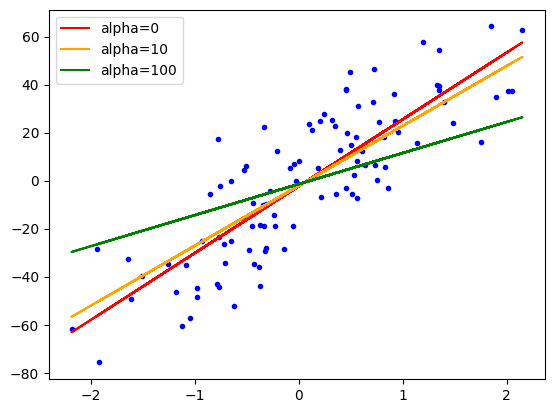

In [28]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color='red',label='alpha=0')
plt.plot(x,r.predict(x),color='orange',label='alpha=10')
plt.plot(x,rr1.predict(x),color='green',label='alpha=100')

plt.legend()

plt.show()

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=2)

In [51]:
class MeraRidge:
    def __init__(self,alpha=.01):
        self.alpha=alpha
        self.m=None
        self.b=None
        
        
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num+ (y_train[i]-y_train.mean())*(x_train[i]-x_train.mean())
            den=den + (x_train[i]-x_train.mean()) * (x_train[i]-x_train.mean()) 
            
        self.m=num/(den + self.alpha)
        self.b=y_train.mean() - (self.m*x_train.mean())
        print(self.m,self.b) 
        
    def predict(self,x_test):
        return (self.m*x_test + self.b)   

In [52]:
mr=MeraRidge(alpha=10)

In [53]:
mr.fit(x_train,y_train)

[24.63571844] [-1.42170294]
